<a href="https://colab.research.google.com/github/Mohame-d04/Datapreprossesing-Logistic_Regression/blob/main/Datapreprossesing_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing our dataset from csv file
import pandas as pd
df=pd.read_csv("/content/titanic-passengers.csv", sep=";")

In [ ]:
#Preprocessing part
df = pd.read_csv('titanic-passengers.csv' ,sep=';',quotechar='"' )

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].describe()

count     891
unique      2
top        No
freq      549
Name: Survived, dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
number_of_elements =len(df['Embarked'])
print("number of elements: ", number_of_elements)
df['Embarked'].fillna('S',inplace=True)

number of elements:  891


In [ ]:
df.dropna(axis=1 ,how='any' ,thresh=None ,inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#Visualization part
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

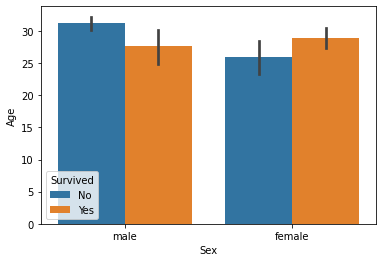

In [ ]:
ax=sns.barplot(x=df['Sex'],y=df['Age'],hue=df['Survived'])

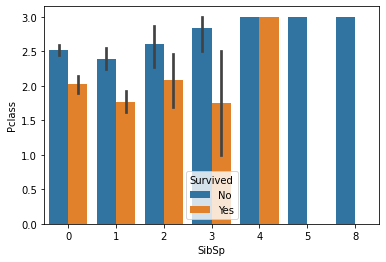

In [ ]:
ax=sns.barplot(x=df['SibSp'],y=df['Pclass'],hue=df['Survived'])

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,  annot = True, annot_kws = { 'fontsize' : 12 })


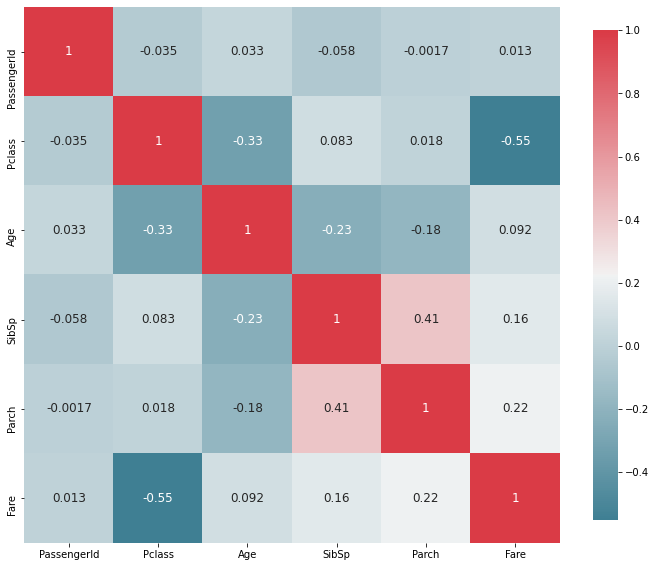

In [ ]:
plot_correlation_map( df )

##      ANALYSE :
 #After running the function, we can see that the output represents a rectangular data as a color-encoded matrix. in the color code bar,the blue part represents the negative correlations and the darker the blue the stronger the correlation. then the middle section where the colors are a little light or almost grey where there's not a correlation at all. and the red represents the positive correlation and the darker the red the stronger the correlation gets we can also see diagnollay,that there's a complete correlation between the elements that are the same. if we look for very strong correlations,we don't find any positive ones but on the other hand we can see a very strong negative correlation between Pclass and Fare and that means as the Fare goes up , the Pclass goes down. if we compare the heatmap to a scatter platform based on the same dataset using seaborn pairplot,we notice that they match as far as correlation goes. if we look at Sibpsp and Parch , we can see that there's a fairly slight correlation going up, we'd expect that to be a slight red in the heatmap which is the case. and we get pretty much the same thing if we look at the correlation between Fare and Pclass, a strongly negative one going down and a dark blue code on the heatmap.texte en italique

In [ ]:
number_of_elements =len(df['Survived'])
print("number of elements: ", number_of_elements)
df['Survived'].fillna('No',inplace=True)

number of elements:  891


In [ ]:
df[['Survived','Pclass']].groupby(['Survived'],as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [ ]:
df.rename({'Name':'Title'},axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [ ]:
title=[]
for x in df["Title"]:
  x=x.split(",")
  x=x[1].split(".")
  title.append(x[0])
df['Title']=title

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Title        891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


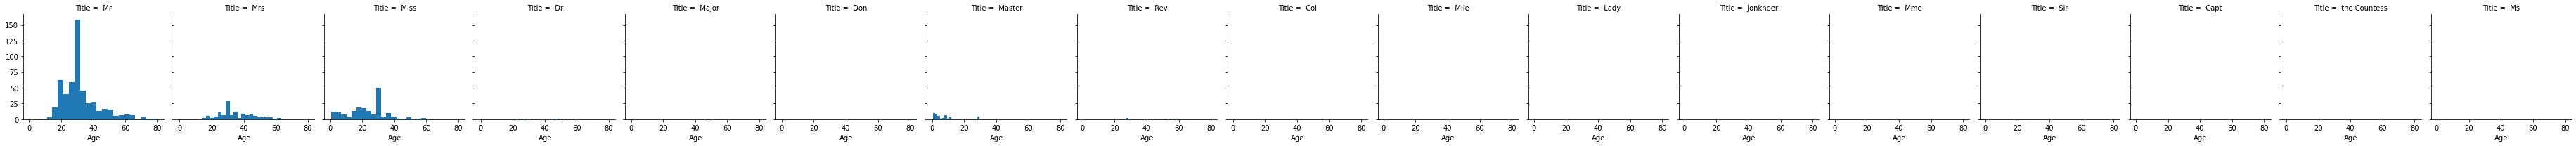

In [ ]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Age',bins=20)

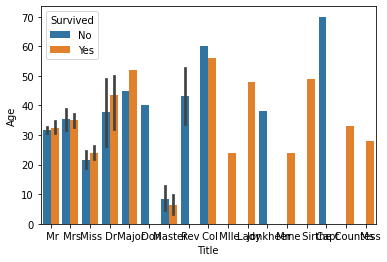

In [ ]:
ax=sns.barplot(x=df['Title'],y=df["Age"],hue=df['Survived'])

In [ ]:
df["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 the Countess      1
 Don               1
 Mme               1
 Lady              1
 Capt              1
 Sir               1
 Ms                1
 Jonkheer          1
Name: Title, dtype: int64

In [ ]:
dict = {
                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df["Title"]=df["Title"].str.strip()

In [ ]:
df=df.replace(dict)

In [ ]:
df["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,Mrs,male,28.000000,0,0,248740,13.0000,S
1,76,No,3,Mrs,male,25.000000,0,0,348123,7.6500,S
2,641,No,3,Mrs,male,20.000000,0,0,350050,7.8542,S
3,568,No,3,Mrs,female,29.000000,0,4,349909,21.0750,S
4,672,No,1,Mrs,male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Mrs,female,14.000000,1,0,237736,30.0708,C
887,61,No,3,Mrs,male,22.000000,0,0,2669,7.2292,C
888,535,No,3,Miss,female,30.000000,0,0,315084,8.6625,S
889,102,No,3,Mrs,male,29.699118,0,0,349215,7.8958,S


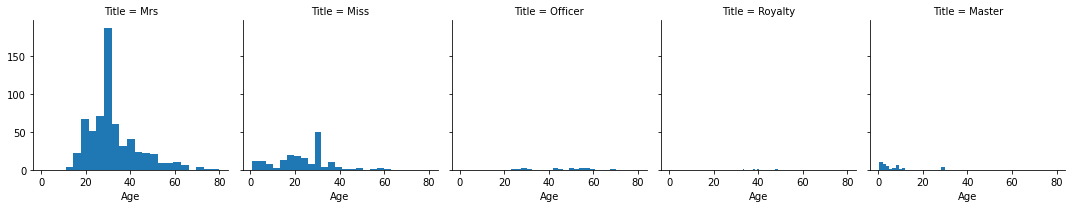

In [ ]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Age',bins=20)

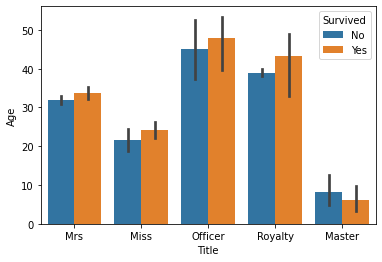

In [ ]:
ax=sns.barplot(x=df['Title'],y=df["Age"],hue=df['Survived'])

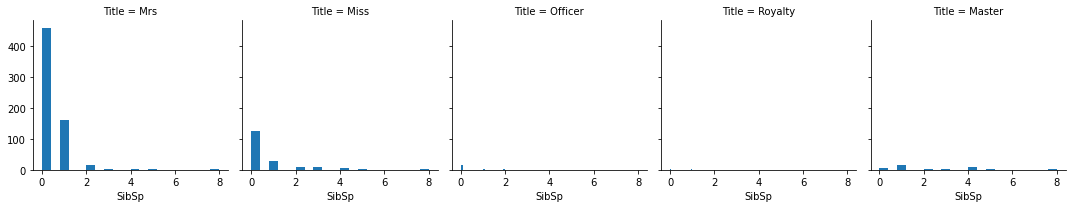

In [ ]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'SibSp',bins=20)

In [ ]:
family=pd.DataFrame()
family["FamilySize"]=df["Parch"]+df["SibSp"]

In [ ]:
df["FamilySize"]=family

In [ ]:
family.head()

,FamilySize
0,0
1,0
2,0
3,4
4,1


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,343,No,2,Mrs,male,28.0,0,0,248740,13.0000,S,0
1,76,No,3,Mrs,male,25.0,0,0,348123,7.6500,S,0
2,641,No,3,Mrs,male,20.0,0,0,350050,7.8542,S,0
3,568,No,3,Mrs,female,29.0,0,4,349909,21.0750,S,4
4,672,No,1,Mrs,male,31.0,1,0,F.C. 12750,52.0000,S,1


In [ ]:
df.drop(['Parch'],axis=1,inplace=True)
df.drop(['SibSp'],axis=1,inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Title,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,343,No,2,Mrs,male,28.000000,248740,13.0000,S,0
1,76,No,3,Mrs,male,25.000000,348123,7.6500,S,0
2,641,No,3,Mrs,male,20.000000,350050,7.8542,S,0
3,568,No,3,Mrs,female,29.000000,349909,21.0750,S,4
4,672,No,1,Mrs,male,31.000000,F.C. 12750,52.0000,S,1
...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Mrs,female,14.000000,237736,30.0708,C,1
887,61,No,3,Mrs,male,22.000000,2669,7.2292,C,0
888,535,No,3,Miss,female,30.000000,315084,8.6625,S,0
889,102,No,3,Mrs,male,29.699118,349215,7.8958,S,0


### **Machine learning :**

       Logistic Regression

In [ ]:
#removing outliers
df=df[df['Fare']<499]

In [ ]:
sns.pairplot(df, x_vars=["Pclass","Title","Sex","Age","Embarked","Fare","FamilySize"], y_vars='Survived', size=7, aspect=0.7)

NameError: ignored

In [ ]:
df['Embarked']

0      S
1      S
2      S
3      S
4      S
      ..
886    C
887    C
888    S
889    S
890    S
Name: Embarked, Length: 888, dtype: object

In [ ]:

sidict={"S":1,"C":0,"Q":2}
df=df.replace(sidict)

In [ ]:
sidict={"Yes":1,"No":0}

df=df.replace(sidict)

In [ ]:
df["Title"].value_counts()

Mrs        641
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [ ]:
sidict={"Mrs":1,"Master":2,"Miss":3,"Officer":4,"Royalty":5}
df=df.replace(sidict)

In [ ]:
sidict={"male":1,"female":0}
df=df.replace(sidict)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Ticket']=encoder.fit_transform(df['Ticket'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Title        888 non-null    int64  
 4   Sex          888 non-null    int64  
 5   Age          888 non-null    float64
 6   Ticket       888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Embarked     888 non-null    int64  
 9   FamilySize   888 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.3 KB


In [ ]:
df['Age']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
#features extraction
x=df[["Title","Pclass","Sex","Age","Embarked","Fare","FamilySize"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
logreg.score(x_test,y_test)

0.8006430868167203

In [ ]:
confution_matrix=pd.crosstab(y_test,y_pred)
print(confution_matrix)

col_0       0   1
Survived         
0         156  35
1          27  93


# A receiver operating characteristic (ROC) curve :
is a graph representing the performance of a classification model for all classification thresholds. This curve plots the rate of true positives as a function of the rate of false positives:

-True positive rate

-False positive rate

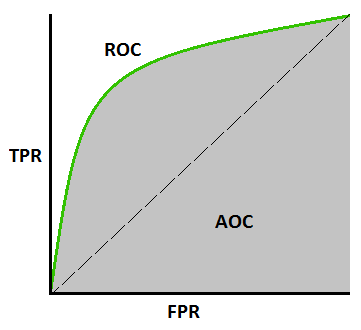

# AUC: area under the ROC curve
AUC stands for "area under the ROC curve". This value measures the entire two-dimensional area under the entire ROC curve (by integral calculations) from (0.0) to (1.1).

No Skill: ROC AUC=0.880
Logistic: ROC AUC=0.880


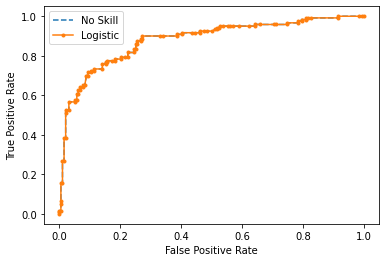

In [ ]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, lr_probs)
print(auc_score1)

0.8801701570680628


### ***Decision Tree & Random Forest***

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,343,0,2,1,1,28,159,13,1,0
1,76,0,3,1,1,25,347,7,1,0
2,641,0,3,1,1,20,409,7,1,0
3,568,0,3,1,0,29,395,21,1,4
4,672,0,1,1,1,31,569,52,1,1


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Title,Sex,Age,Ticket,Fare,Embarked,FamilySize
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,1.542793,0.647523,29.524775,337.512387,30.163288,0.900901,0.906532
std,257.405474,0.486091,0.834007,0.923435,0.478011,13.031375,200.416061,41.185304,0.512833,1.615609
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,1.000000,0.000000,22.000000,158.000000,7.000000,1.000000,0.000000
50%,445.500000,0.000000,3.000000,1.000000,1.000000,29.000000,335.500000,14.000000,1.000000,0.000000
75%,667.250000,1.000000,3.000000,2.000000,1.000000,35.000000,518.250000,30.250000,1.000000,1.000000
max,891.000000,1.000000,3.000000,5.000000,1.000000,80.000000,679.000000,263.000000,2.000000,10.000000


In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#features extraction
x=df[["Pclass","Sex","Age","Embarked","FamilySize"]]
y= df["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [ ]:
x

,Pclass,Sex,Age,Embarked,FamilySize
0,2,1,28,1,0
1,3,1,25,1,0
2,3,1,20,1,0
3,3,0,29,1,4
4,1,1,31,1,1
...,...,...,...,...,...
886,2,0,14,0,1
887,3,1,22,0,0
888,3,0,30,1,0
889,3,1,29,1,0


In [ ]:
#applying tree algorithm
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7921348314606742


In [ ]:
#treen plotting
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

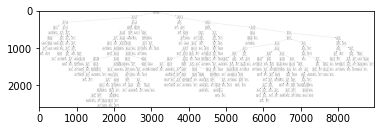

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
df = tree.export_graphviz(dtree, out_file=None)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Changing parameters
tree = tree.DecisionTreeClassifier(max_depth=10,random_state=10)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.797752808988764


In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Changing parameters
tree = tree.DecisionTreeClassifier(max_depth=10,random_state=110)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7921348314606742


### ***Comparison***

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25) #splitting data with test size of 25%

In [ ]:
clf=RandomForestClassifier(n_estimators=300)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8018018018018018


### ***comparison***
## ***using the random forest made the score go up***